In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("img.png")

(1000, 707, 3)


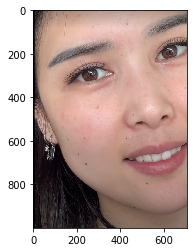

In [6]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

<h2> built in filters in cv2</h2>
<ol>
    <li> cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) <br>
        simple averaging</li>
    <li> cv2.medianBlur(	src, ksize[, dst]	)<br>
        use median instead of gaussian, kernel size must be a positive odd integer.</li>
    <li> cv2.GaussianBlur(	src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]	)<br>
        simgaX, sigmaY: Gaussian kernel standard deviation<br>
        dst=0: 	output image of the same size and type as src.<br>
        preserves more details</li>
        
    
    


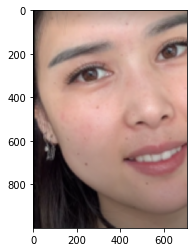

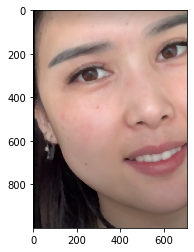

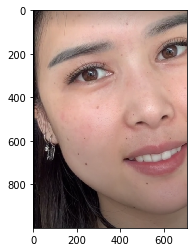

In [40]:
img_blurred = cv2.blur(img,(11,11))
plt.imshow(img_blurred)
img_median = cv2.medianBlur(img,11)
plt.figure()
plt.imshow(img_median)
img_gaussian = cv2.GaussianBlur(img,(5,5),0) 
plt.figure()
plt.imshow(img_gaussian)

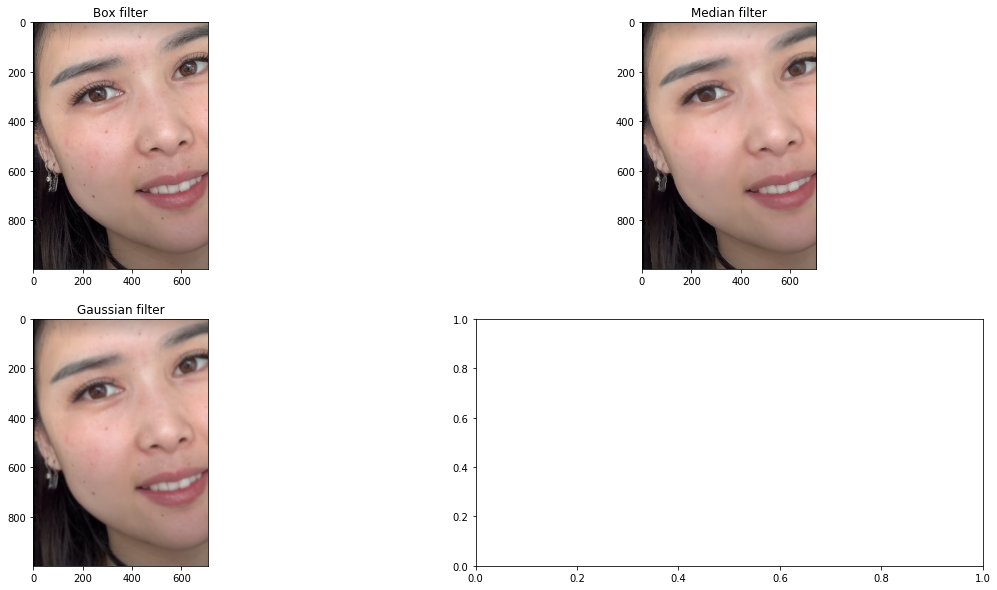

In [53]:
#try iterate through the filters using small kernels multiple times
iteration = 10
kernel_size = 5
img_box_iter = img
img_median_iter = img
img_gaussian_iter = img

for _ in range(iteration):
    img_box_iter = cv2.blur(img,(kernel_size,kernel_size))
    img_median_iter=cv2.medianBlur(img_median_iter,kernel_size)
    img_gaussian_iter = cv2.GaussianBlur(img_gaussian_iter,(kernel_size,kernel_size),0) 

    
    
#plot results
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(img_box_iter)
ax1.title.set_text('Box filter')
ax2.imshow(img_median_iter)
ax2.title.set_text('Median filter')
ax3.imshow(img_gaussian_iter)
ax3.title.set_text('Gaussian filter')

__Result__ : Median filter gives better noise reduction  - feature blurring balance

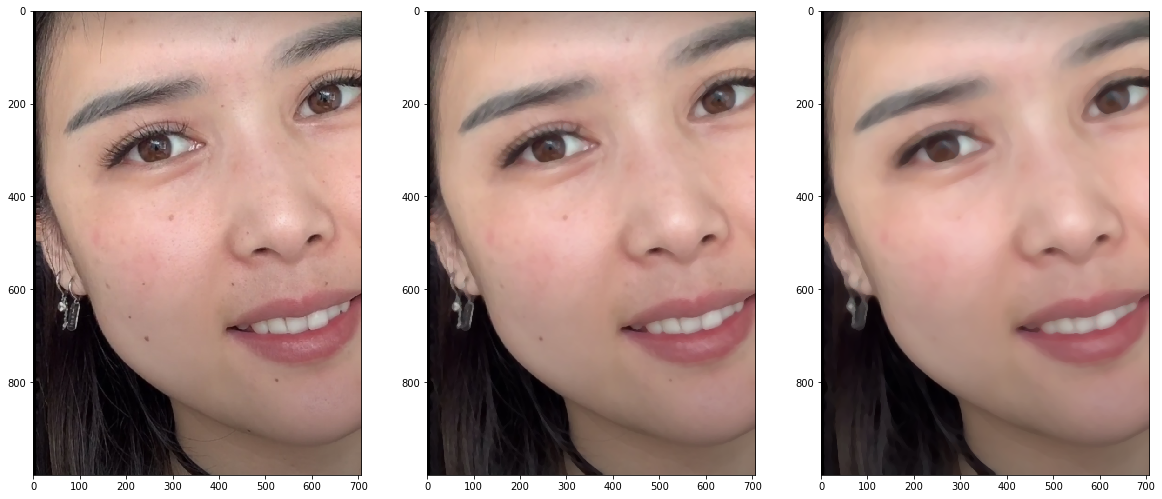

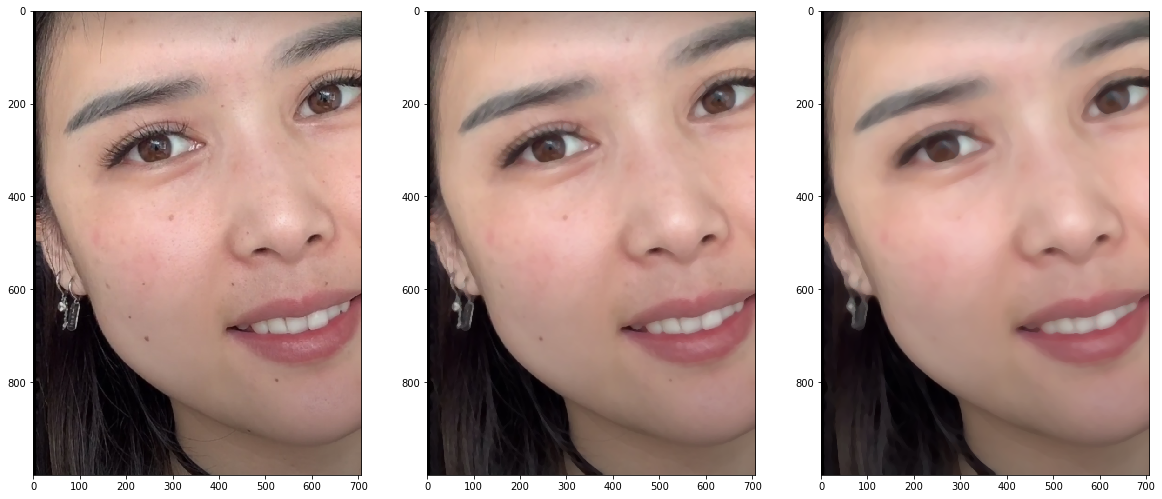

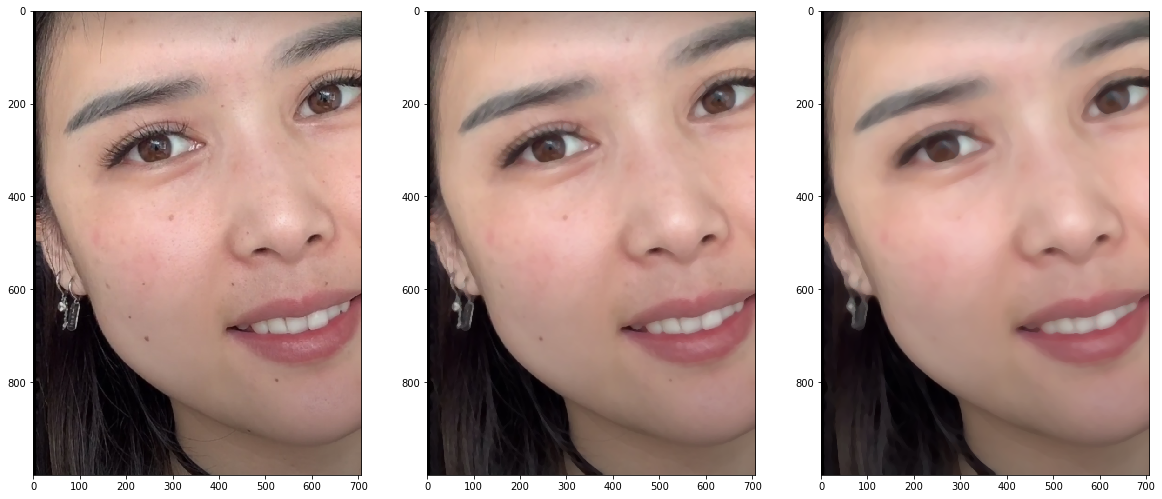

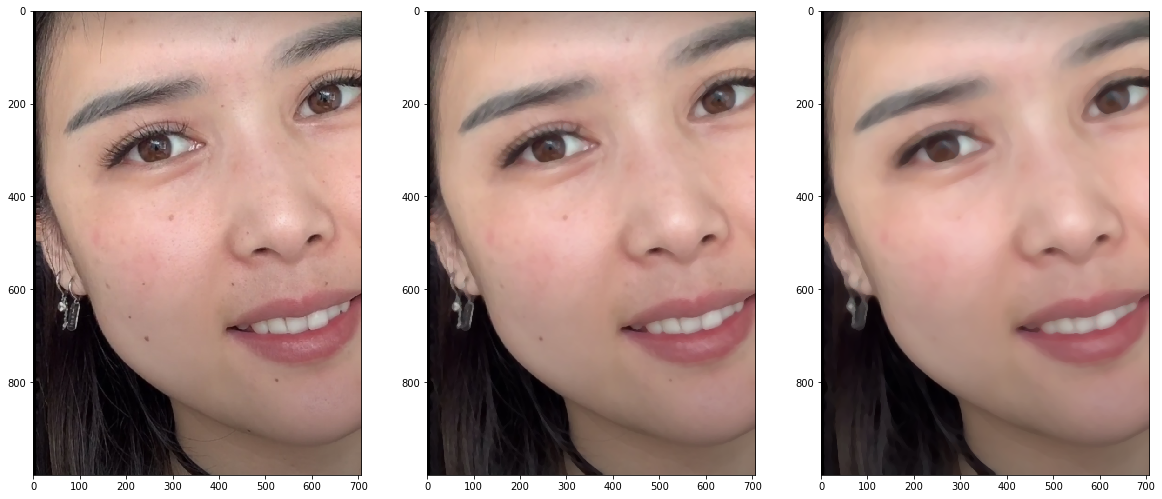

In [64]:
#explore parameters for median blur

kernel_size = [3,5,7,9]
iterations = [2,4,6]
for i in range(len(kernel_size)):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    ax = [ax1, ax2, ax3]
    img_median_iter = img
    for i, iteration in enumerate(iterations):
        for _ in range(iteration):
            img_median_iter=cv2.medianBlur(img_median_iter,kernel_size[i])
        cur_ax = ax[i]    
        cur_ax.imshow(img_median_iter)
    
    

__Result__ : we can get ok result using 4-6 iterations with kernel size of 3-9

<h2> To do: construct aforementioned filters from scratch</h2>

<h1> Bilateral Filter </h1>
<a href = "https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf"> Bilateral Filter </a><br>
    
<a href="https://youtu.be/S9Cd_VgegZE"> Siggraph Tutorial </a> <br>

Both box and gaussian filters blur edges. A class of filtering techniques, called edge-preserving noise reduction get around this problem. Bilateral Filter is one of them.bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is very slow compared to most filters.<br>

<h2> Broader idea</h2>
Split an image into:<br>
__structure__ : large scale features
__texture__ : small scale feature



<h2> cv2 built-in bilateralFilter </h2>
cv2.bilateralFilter(	src, d, sigmaColor, sigmaSpace[, dst[, borderType]]	)<br>

__d__	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.<br>
__sigmaColor__	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.<br>
__sigmaSpace__	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.<br>

In [18]:
img_bilateral = cv2.bilateralFilter(img, )

array([[[  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [149, 127, 112],
        [149, 126, 112],
        [149, 126, 112]],

       [[  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [149, 128, 112],
        [149, 127, 112],
        [149, 126, 112]],

       [[  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [150, 128, 112],
        [150, 128, 112],
        [150, 127, 113]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [135, 113, 100],
        [134, 112,  99],
        [134, 112,  99]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [135, 113, 100],
        [134, 112,  99],
        [134, 112,  99]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [134, 112,  99],
        [134, 112,  99],
        [134, 112,  99]]